In [1]:
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("donaciones-de-sangre-y-aferesis.csv", sep = ";")

In [3]:
df.head()

,Num_reg,Fecha_donacion,Grupo,Rh,Edad,Provincia,Genero,Tipo_donacion
0,80005,2018-10-05,B,+,57,Valladolid,M,AFERESIS DE PLASMA
1,80009,2018-10-05,A,+,35,Salamanca,M,SANGRE T. ALOGENICA
2,80011,2018-10-05,A,+,51,Salamanca,M,SANGRE T. ALOGENICA
3,80013,2018-10-05,O,+,42,Salamanca,F,SANGRE T. ALOGENICA
4,80014,2018-10-05,B,-,35,Salamanca,M,SANGRE T. ALOGENICA


## EDA Y Preprocesado

### Análisis gráfico y descriptivo de las variables

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722079 entries, 0 to 722078
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Num_reg         722079 non-null  int64 
 1   Fecha_donacion  722079 non-null  object
 2   Grupo           721244 non-null  object
 3   Rh              721242 non-null  object
 4   Edad            722079 non-null  int64 
 5   Provincia       722079 non-null  object
 6   Genero          722079 non-null  object
 7   Tipo_donacion   722079 non-null  object
dtypes: int64(2), object(6)
memory usage: 44.1+ MB


In [5]:
# Comprabamos duplicados antes de eliminar la columna de identificación de cada registro
df.duplicated().sum()

0

Primeras transformaciones

In [6]:
# Eliminamos la variable de identificación
df = df.drop(columns=["Num_reg"])

# Convertimos la variable Fecha_donacion a tipo datetime y creamos variables derivadas
df["Fecha_donacion"] = pd.to_datetime(df["Fecha_donacion"])
df["Mes"] = df["Fecha_donacion"].dt.month
df["Año"] = df["Fecha_donacion"].dt.year
df["Día_semana"] = df["Fecha_donacion"].dt.day_name()

# Creamos rangos de edad y los convertimos a categóricos
bins = [18, 30, 45, 60, 75, df["Edad"].max()]
labels = ["18-30", "31-45", "46-60", "61-75", "76+"]
df["Rango_edad"] = pd.cut(df["Edad"], bins=bins, labels=labels).astype("category")

# Convertimos Provincia, Genero y Tipo_donacion a categórica
df["Provincia"] = df["Provincia"].astype("category")
df["Genero"] = df["Genero"].astype("category")
df["Tipo_donacion"] = df["Tipo_donacion"].astype("category")

# Combinar Grupo y Rh en una sola columna
df["Grupo_Rh"] = df["Grupo"].astype(str) + df["Rh"].astype(str)
df["Grupo_Rh"] = df["Grupo_Rh"].astype("category")
df = df.drop(columns=["Grupo", "Rh"])


In [7]:
df = df.drop(columns=["Edad"])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722079 entries, 0 to 722078
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Fecha_donacion  722079 non-null  datetime64[ns]
 1   Provincia       722079 non-null  category      
 2   Genero          722079 non-null  category      
 3   Tipo_donacion   722079 non-null  category      
 4   Mes             722079 non-null  int32         
 5   Año             722079 non-null  int32         
 6   Día_semana      722079 non-null  object        
 7   Rango_edad      711348 non-null  category      
 8   Grupo_Rh        722079 non-null  category      
dtypes: category(5), datetime64[ns](1), int32(2), object(1)
memory usage: 20.0+ MB


In [9]:
df.head()

,Fecha_donacion,Provincia,Genero,Tipo_donacion,Mes,Año,Día_semana,Rango_edad,Grupo_Rh
0,2018-10-05,Valladolid,M,AFERESIS DE PLASMA,10,2018,Friday,46-60,B+
1,2018-10-05,Salamanca,M,SANGRE T. ALOGENICA,10,2018,Friday,31-45,A+
2,2018-10-05,Salamanca,M,SANGRE T. ALOGENICA,10,2018,Friday,46-60,A+
3,2018-10-05,Salamanca,F,SANGRE T. ALOGENICA,10,2018,Friday,31-45,O+
4,2018-10-05,Salamanca,M,SANGRE T. ALOGENICA,10,2018,Friday,31-45,B-


In [10]:
df.describe()

,Fecha_donacion,Mes,Año
count,722079,722079.000000,722079.000000
mean,2021-05-29 01:37:40.079021568,6.336363,2020.923136
min,2018-01-02 00:00:00,1.000000,2018.000000
25%,2019-09-20 00:00:00,3.000000,2019.000000
50%,2021-06-05 00:00:00,6.000000,2021.000000
75%,2023-02-03 00:00:00,9.000000,2023.000000
max,2024-09-30 00:00:00,12.000000,2024.000000
std,NaN,3.409476,1.948954


Veamos las categorías de las variables categóricas

In [11]:
df["Provincia"].unique()

['Valladolid', 'Salamanca', 'Palencia', 'Soria', 'Burgos', 'Segovia', 'Ávila', 'León', 'Zamora']
Categories (9, object): ['Burgos', 'León', 'Palencia', 'Salamanca', ..., 'Soria', 'Valladolid', 'Zamora', 'Ávila']

In [12]:
df["Genero"].unique()

['M', 'F']
Categories (2, object): ['F', 'M']

In [13]:
df["Tipo_donacion"].unique()

['AFERESIS DE PLASMA', 'SANGRE T. ALOGENICA', 'AFERESIS DE PLAQUETAS', 'AFERESIS PLASMA CONVALECIENTE COVID-19']
Categories (4, object): ['AFERESIS DE PLAQUETAS', 'AFERESIS DE PLASMA', 'AFERESIS PLASMA CONVALECIENTE COVID-19', 'SANGRE T. ALOGENICA']

In [14]:
df["Rango_edad"].unique()

['46-60', '31-45', '18-30', '61-75', NaN, '76+']
Categories (5, object): ['18-30' < '31-45' < '46-60' < '61-75' < '76+']

In [15]:
df["Grupo_Rh"].unique()

['B+', 'A+', 'O+', 'B-', 'O-', ..., 'AB-', 'nannan', 'SIN RESULTADOnan', 'SIN RESULTADO+', 'SIN RESULTADO-']
Length: 12
Categories (12, object): ['A+', 'A-', 'AB+', 'AB-', ..., 'SIN RESULTADO+', 'SIN RESULTADO-', 'SIN RESULTADOnan', 'nannan']

In [16]:
# En Grupo_Rh vamos a transformar en valores nulos aquellas categorías que no nos aportan información útil
invalid_values = ["nannan", "SIN RESULTADOnan", "SIN RESULTADO+", "SIN RESULTADO-"]
df["Grupo_Rh"] = df["Grupo_Rh"].replace(invalid_values, np.nan)

In [17]:
df.isna().sum()

Fecha_donacion        0
Provincia             0
Genero                0
Tipo_donacion         0
Mes                   0
Año                   0
Día_semana            0
Rango_edad        10731
Grupo_Rh            839
dtype: int64

In [18]:
df["Día_semana"] = df["Día_semana"].astype("category")
df["Mes"] = df["Mes"].astype("category")
df["Año"] = df["Año"].astype("category")

A continuación veamos gráficamente la distribución de las variables

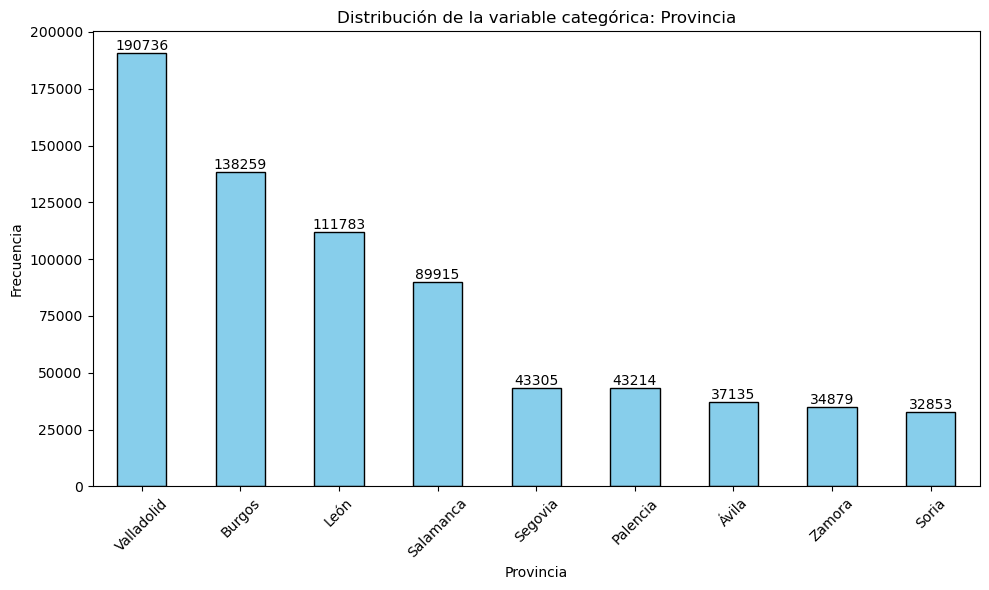

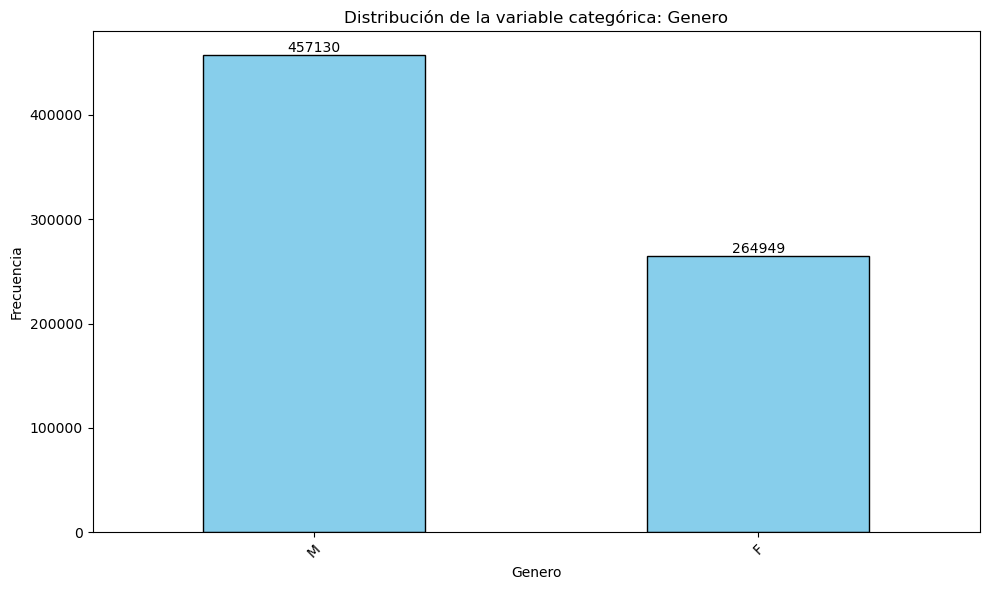

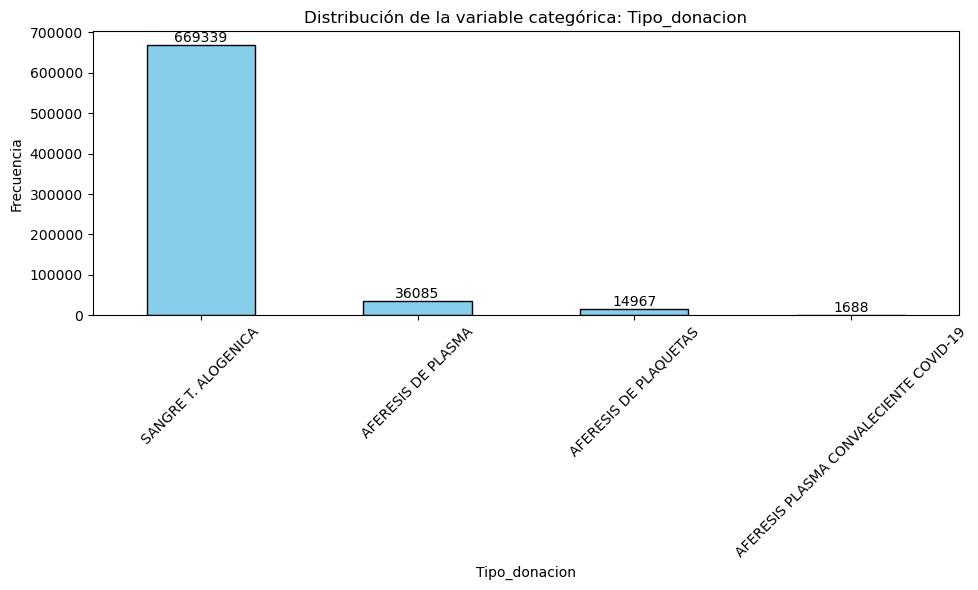

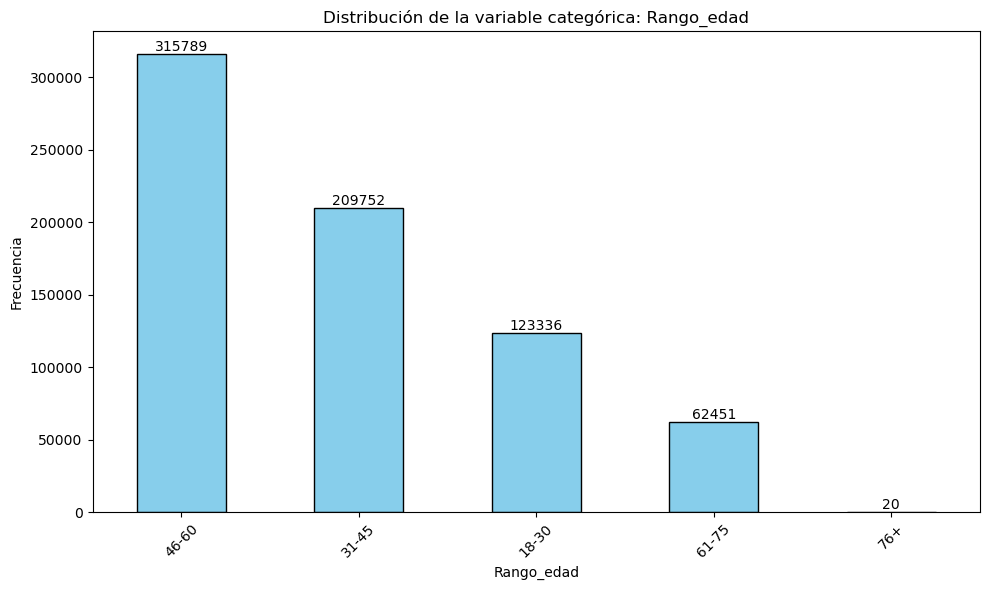

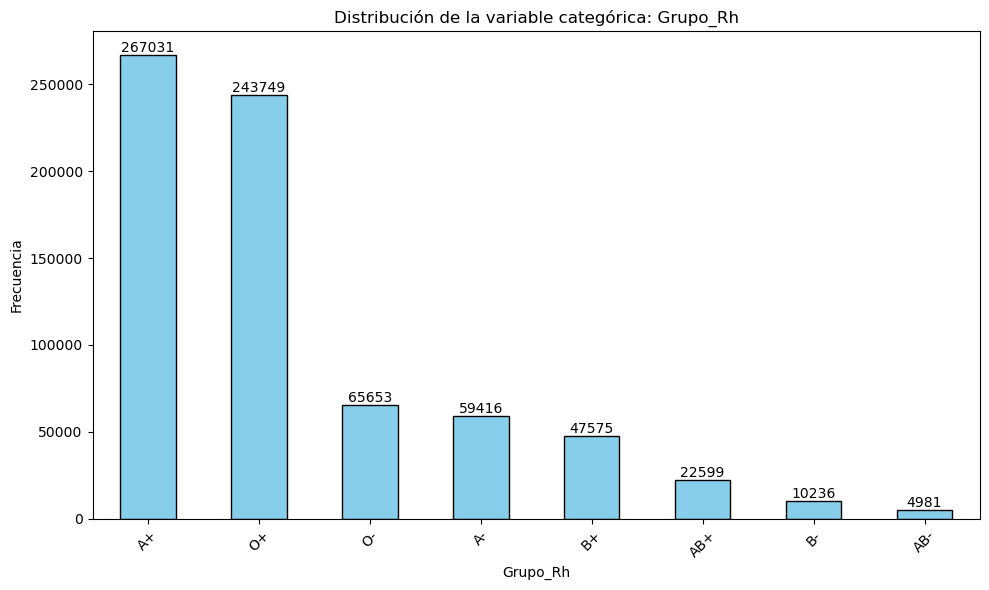

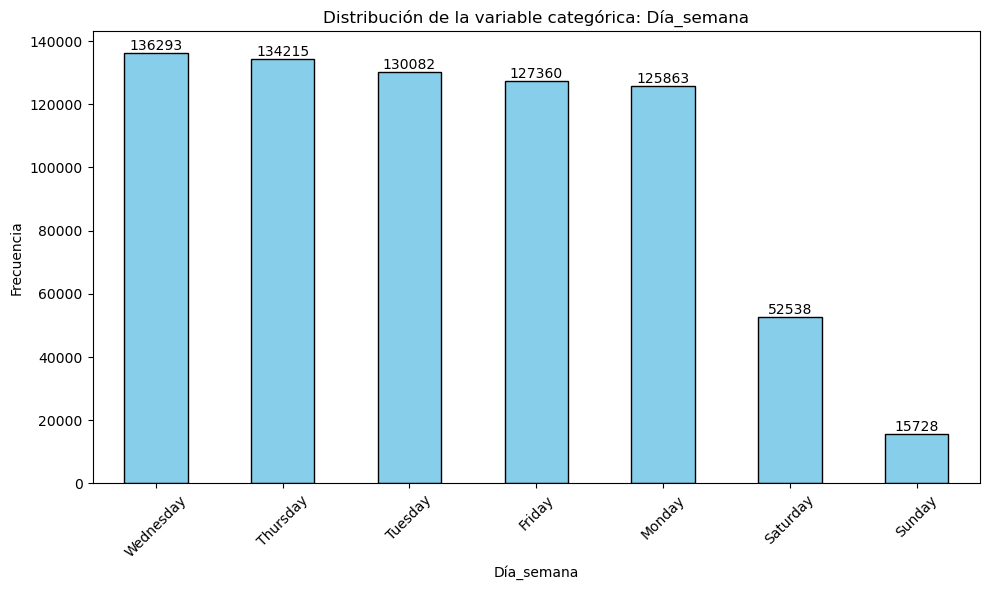

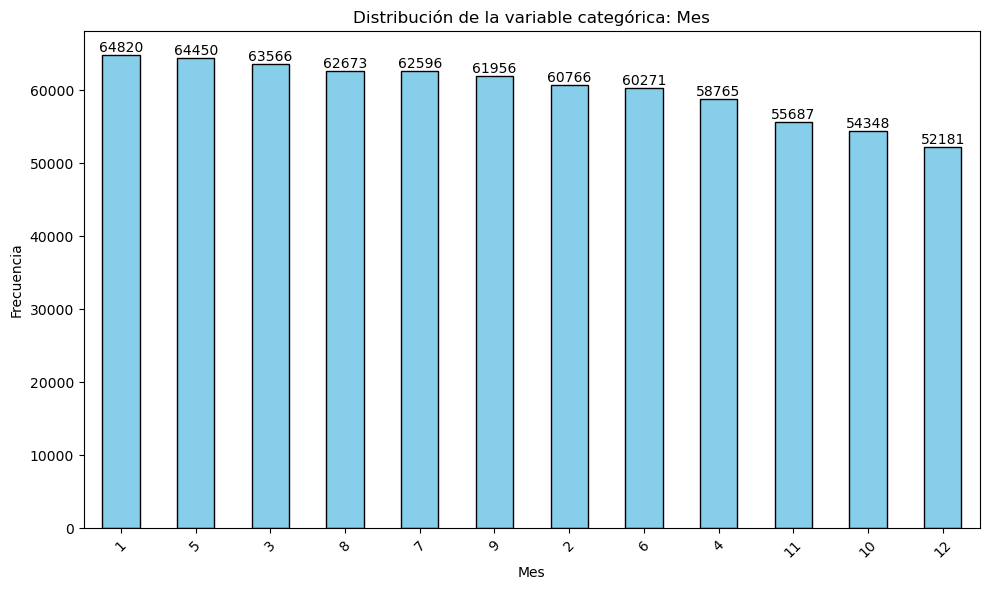

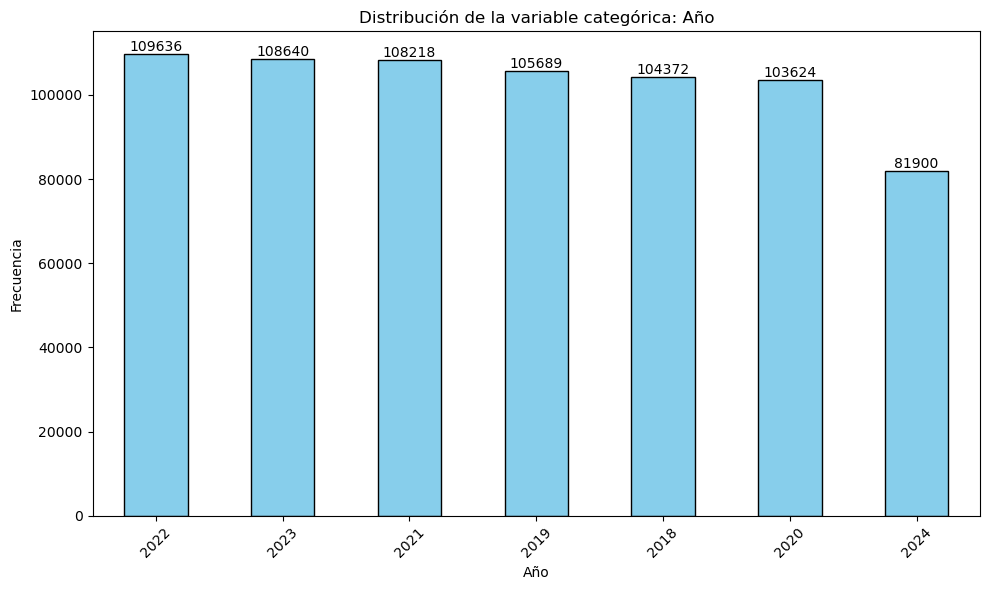

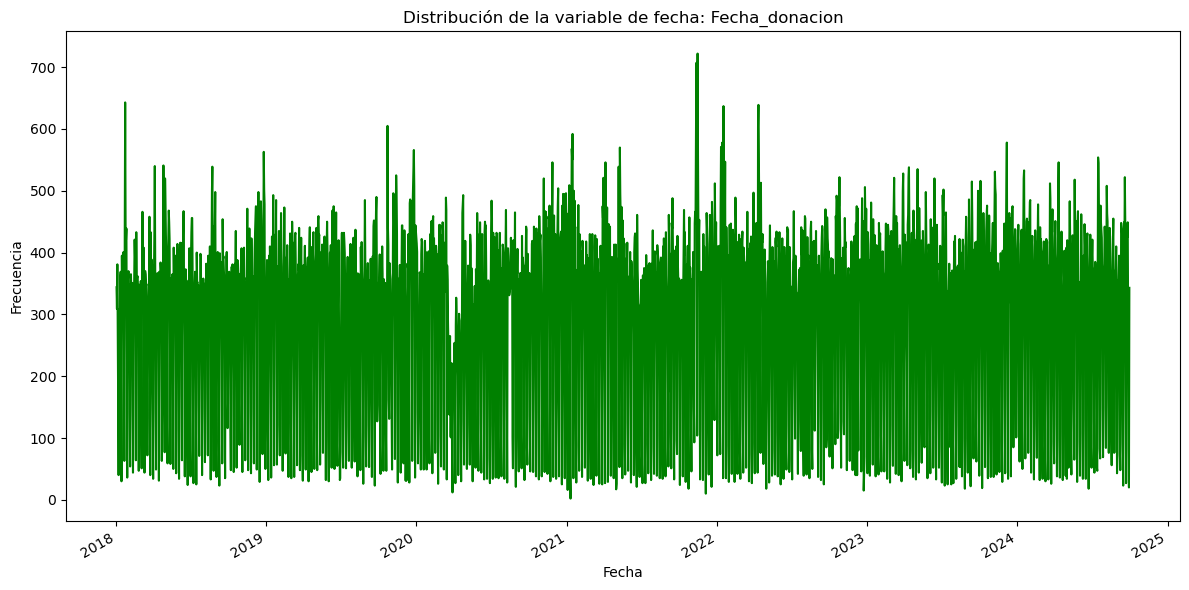

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

categoricas = ["Provincia", "Genero", "Tipo_donacion", "Rango_edad", "Grupo_Rh", "Día_semana", "Mes", "Año"]
fecha = "Fecha_donacion"

# Categóricas
for var in categoricas:
    plt.figure(figsize=(10, 6))
    counts = df[var].value_counts()
    ax = counts.plot(kind="bar", color="skyblue", edgecolor="black")
    plt.title(f"Distribución de la variable categórica: {var}")
    plt.xlabel(var)
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45)

    for p in ax.patches:
        ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha="center", va="bottom", fontsize=10)
    
    plt.tight_layout()
    plt.show()

# Fecha
plt.figure(figsize=(12, 6))
counts = df[fecha].value_counts().sort_index()
ax = counts.plot(color="green")
plt.title("Distribución de la variable de fecha: Fecha_donacion")
plt.xlabel("Fecha")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()


A continuación visualizaremos algunas relaciones bivariantes las cuales nos ayudarán a identificar patrones temporales, demográficos y geográficos que aporten valor al entender el comportamiento de los donantes. Esto facilita detectar tendencias, diferencias y áreas de mejora en las campañas de donación.

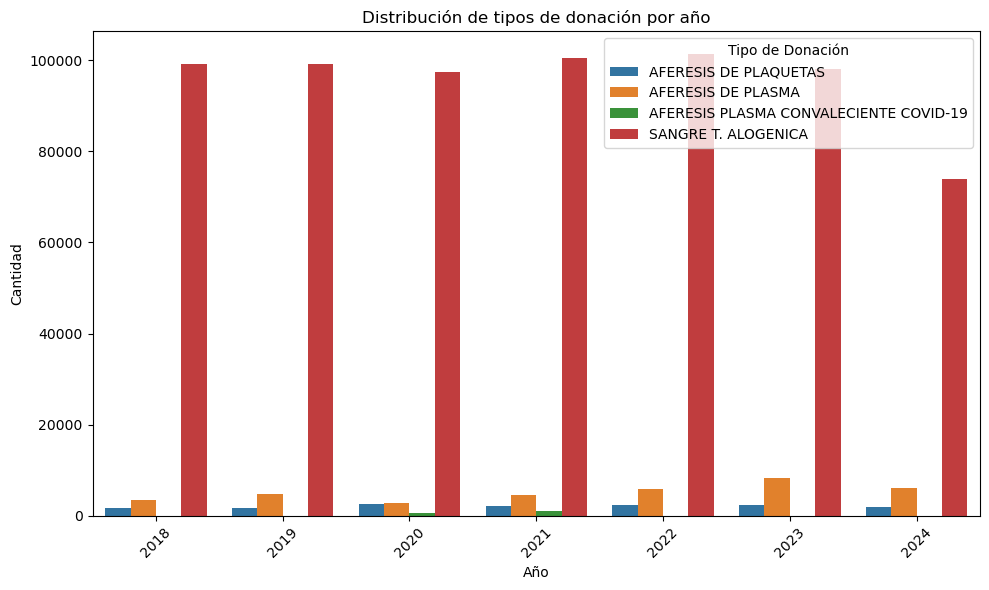

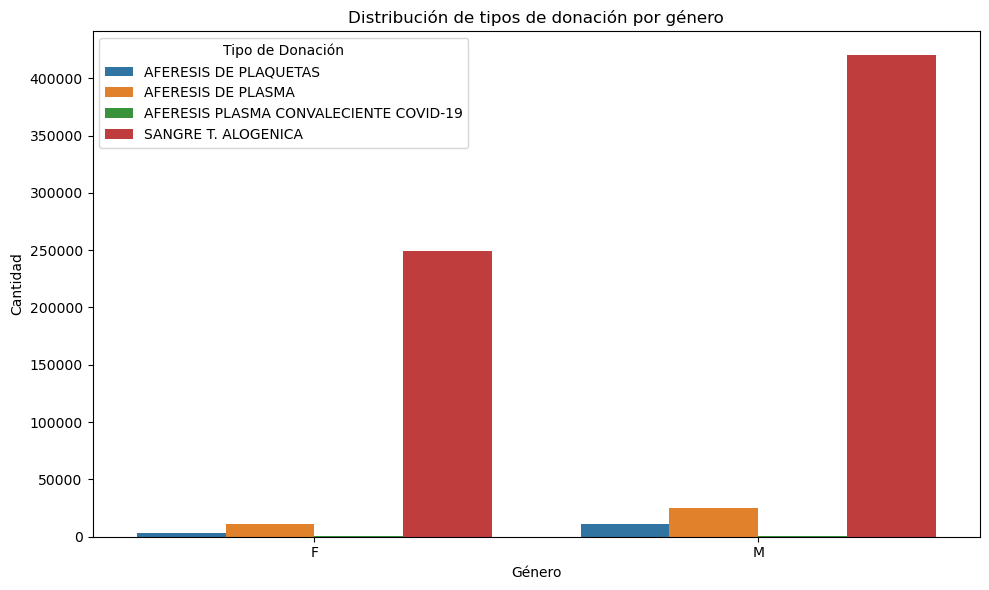

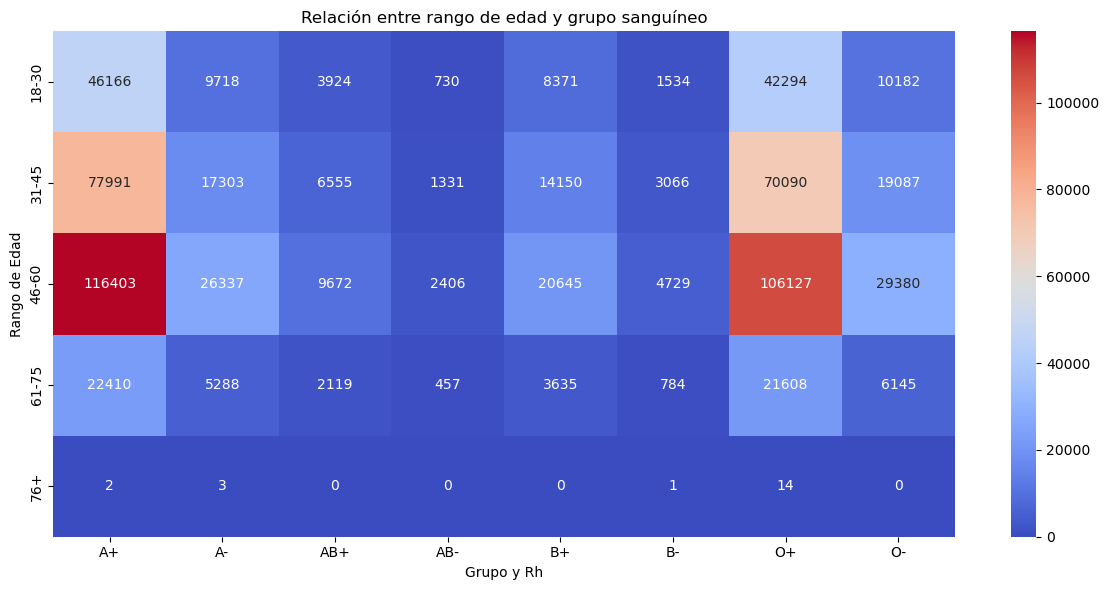

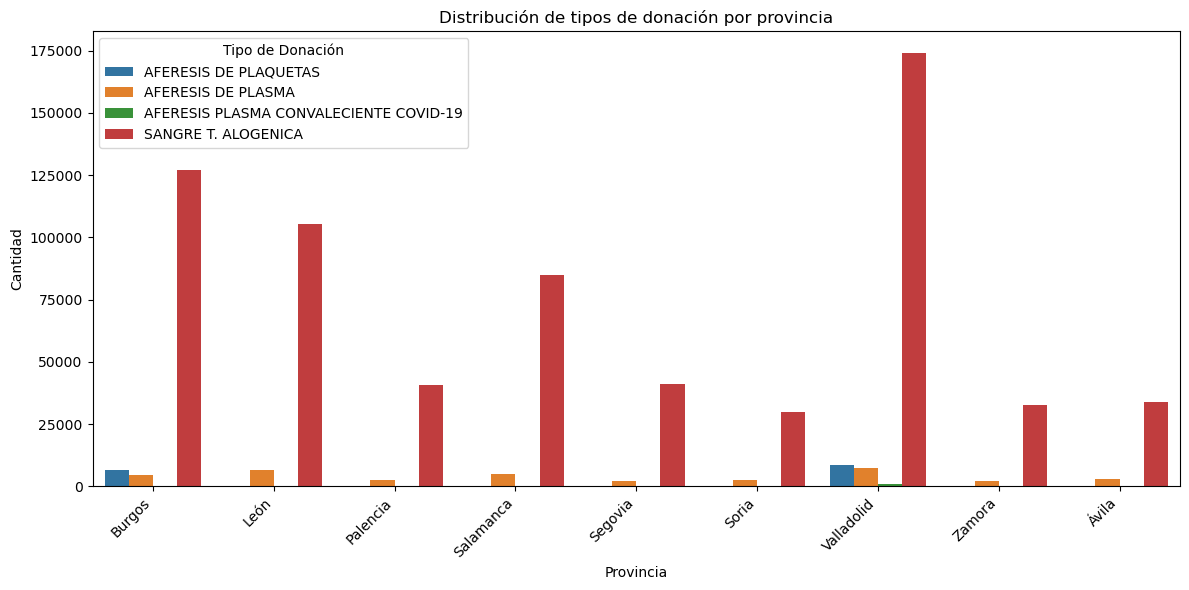

<Figure size 1200x600 with 0 Axes>

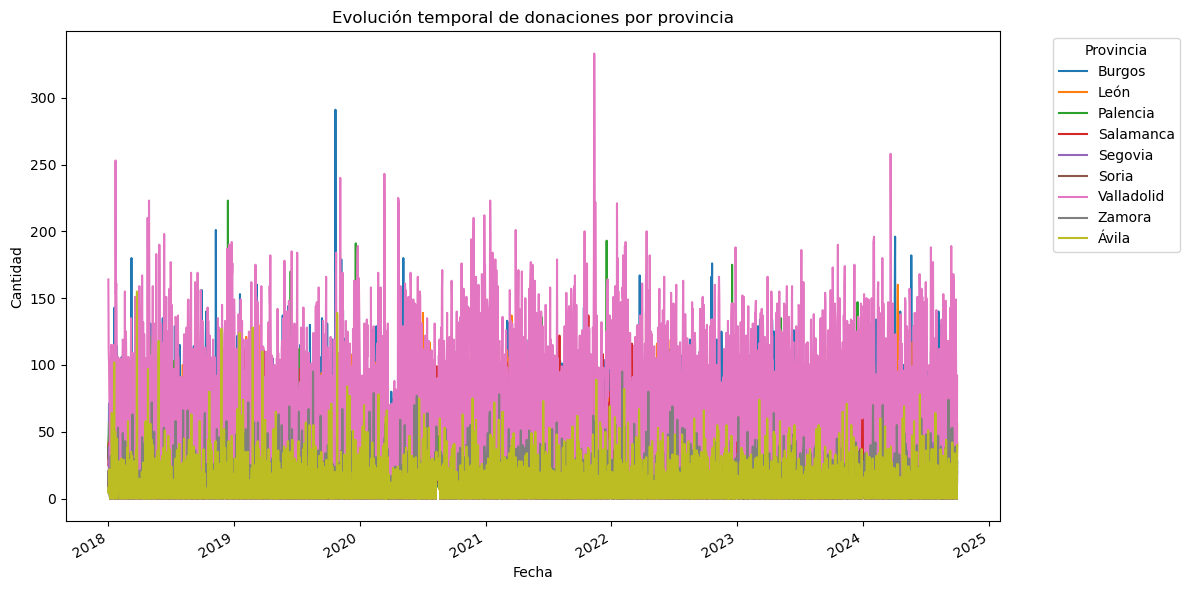

In [20]:
# 1. Año vs Tipo_donacion
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Año", hue="Tipo_donacion")
plt.title("Distribución de tipos de donación por año")
plt.xlabel("Año")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.legend(title="Tipo de Donación")
plt.tight_layout()
plt.show()

# 2. Género vs Tipo_donacion
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Genero", hue="Tipo_donacion")
plt.title("Distribución de tipos de donación por género")
plt.xlabel("Género")
plt.ylabel("Cantidad")
plt.legend(title="Tipo de Donación")
plt.tight_layout()
plt.show()

# 3. Rango_edad vs Grupo_Rh (heatmap)
pivot_edad_grupo = df.pivot_table(index="Rango_edad", columns="Grupo_Rh", aggfunc="size", fill_value=0)
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_edad_grupo, annot=True, fmt="d", cmap="coolwarm")
plt.title("Relación entre rango de edad y grupo sanguíneo")
plt.xlabel("Grupo y Rh")
plt.ylabel("Rango de Edad")
plt.tight_layout()
plt.show()

# 4. Provincia vs Tipo_donacion
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="Provincia", hue="Tipo_donacion")
plt.title("Distribución de tipos de donación por provincia")
plt.xlabel("Provincia")
plt.ylabel("Cantidad")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Tipo de Donación")
plt.tight_layout()
plt.show()

# 5. Fecha_donacion vs Provincia (evolución temporal)
plt.figure(figsize=(12, 6))
df.groupby(["Fecha_donacion", "Provincia"]).size().unstack().plot(kind="line", figsize=(12, 6))
plt.title("Evolución temporal de donaciones por provincia")
plt.xlabel("Fecha")
plt.ylabel("Cantidad")
plt.legend(title="Provincia", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


Las donaciones más frecuentes, con mucha diferencia, son las de Sangre Total Alogénica, con los hombres y el rango de edad de 46-60 años como principales contribuyentes, especialmente en grupos A+ y O+. Valladolid destaca en volumen. Las donaciones son estables a lo largo del tiempo, con picos en momentos concretos.

### Valores faltantes

A continuación procederemos a la imputación de los valores faltantes de las variables de rango edad y Grupo_RH

In [21]:
df.isna().sum()

Fecha_donacion        0
Provincia             0
Genero                0
Tipo_donacion         0
Mes                   0
Año                   0
Día_semana            0
Rango_edad        10731
Grupo_Rh            839
dtype: int64

In [22]:
missing_percent = df.isnull().mean() * 100
print(missing_percent)


Fecha_donacion    0.000000
Provincia         0.000000
Genero            0.000000
Tipo_donacion     0.000000
Mes               0.000000
Año               0.000000
Día_semana        0.000000
Rango_edad        1.486125
Grupo_Rh          0.116192
dtype: float64


Debido a la poca cantidad de NAs, las imputaremos por la moda

In [23]:
# Variables a imputar
columnas_a_imputar = ["Rango_edad", "Grupo_Rh"]

# Imputamos NAs con la moda de cada variable
for col in columnas_a_imputar:
    moda = df[col].mode()[0]  
    df[col].fillna(moda, inplace=True)  

# Verificamos
print(df[columnas_a_imputar].isnull().sum())

Rango_edad    0
Grupo_Rh      0
dtype: int64


In [24]:
missing_percent = df.isnull().mean() * 100
print(missing_percent)

Fecha_donacion    0.0
Provincia         0.0
Genero            0.0
Tipo_donacion     0.0
Mes               0.0
Año               0.0
Día_semana        0.0
Rango_edad        0.0
Grupo_Rh          0.0
dtype: float64


### Equilibrado de la muestra

Dada la distribución de la variable Tipo_donacion para mejorar el rendimiento del modelo y garantizar que todas las clases sean correctamente consideradas, llevaremos a cabo un balanceo de la muestra utilizando SMOTE, equilibrando así la representación de cada tipo de donación en el conjunto de entrenamiento.

In [25]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

# Codificamos el target (Tipo_donacion)
label_encoder = LabelEncoder()
df["Tipo_donacion_encoded"] = label_encoder.fit_transform(df["Tipo_donacion"])

# Variables independientes (X) y dependiente (y)
X = df.drop(columns=["Tipo_donacion", "Tipo_donacion_encoded", "Fecha_donacion"])  # Eliminar columnas no numéricas
y = df["Tipo_donacion_encoded"]

# Convertimos en numéricas con One-Hot Encoding
X = pd.get_dummies(X, drop_first=True)

X = X.astype(int)

# Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Aplicamos SMOTE para equilibrar todas las clases en el conjunto de entrenamiento
smote = SMOTE(random_state=123)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Verificamos la distribución de las clases después de SMOTE
print("Distribución de clases después de SMOTE:\n", pd.Series(y_train_smote).value_counts())

Distribución de clases después de SMOTE:
 Tipo_donacion_encoded
3    535557
1    535557
0    535557
2    535557
Name: count, dtype: int64


## Modelo

A continuación llevaremos a cabo un modelo con el objetvio de poder predecir el tipo de donación (Sangre Total Alogénica, Aféresis de Plasma, etc.) en función de las características del donante, para optimizar la gestión de donaciones y mejorar la planificación de recursos. 

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier

param_grid = {
    'learning_rate': [0.1],
    'max_depth': [3, 5],
    'n_estimators': [100, 200],
    'subsample': [0.8]
}

grid_search = GridSearchCV(
    estimator=XGBClassifier(objective="multi:softmax", num_class=len(label_encoder.classes_), random_state=123),
    param_grid=param_grid,
    scoring='f1_macro',  
    cv=3,  
    verbose=1,  
    n_jobs=-1  
)

grid_search.fit(X_train_smote, y_train_smote)
best_model = grid_search.best_estimator_
print("Mejores parámetros encontrados:", grid_search.best_params_)

# Predicciones con el mejor modelo
y_pred = best_model.predict(X_test)

# Evaluación
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Fitting 3 folds for each of 4 candidates, totalling 12 fits
Mejores parámetros encontrados: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Accuracy: 0.5298581874584534

Confusion Matrix:
 [[ 2520   115   261   162]
 [ 1149  4821   287  1000]
 [    9    12   280    18]
 [31850 24909  8124 68899]]

Classification Report:
                                         precision    recall  f1-score   support

                 AFERESIS DE PLAQUETAS       0.07      0.82      0.13      3058
                    AFERESIS DE PLASMA       0.16      0.66      0.26      7257
AFERESIS PLASMA CONVALECIENTE COVID-19       0.03      0.88      0.06       319
                   SANGRE T. ALOGENICA       0.98      0.52      0.68    133782

                              accuracy                           0.53    144416
                             macro avg       0.31      0.72      0.28    144416
                          weighted avg       0.92      0.53      0.64    144416



Vemos si mejora con un LightGBM.

In [35]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Definimos los hiperparámetros
param_grid = {
    'learning_rate': [0.1],
    'max_depth': [3, 5],
    'n_estimators': [100, 200],
    'subsample': [0.8]
}
# Configurar el GridSearchCV
grid_search = GridSearchCV(
    estimator=LGBMClassifier(objective="multiclass", random_state=123),
    param_grid=param_grid,
    scoring='f1_macro',  
    cv=3,  
    verbose=1,  
    n_jobs=-1  
)

# Ajustar el GridSearchCV con los datos balanceados
grid_search.fit(X_train_smote, y_train_smote)

# Obtener el mejor modelo encontrado por el GridSearch
best_model = grid_search.best_estimator_

# Imprimimos los mejores parámetros
print("Mejores parámetros encontrados:", grid_search.best_params_)

y_pred = best_model.predict(X_test)

# Evaluación
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Fitting 3 folds for each of 4 candidates, totalling 12 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.029062 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 84
[LightGBM] [Info] Number of data points in the train set: 2142228, number of used features: 42
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

Tanto XGBoost como LightGBM muestran un desempeño similar, logrando altos niveles de recall en las clases minoritarias, como "Aféresis Plasma Convaleciente COVID-19" (88% en XGBoost y 84% en LightGBM), pero con baja precisión, lo que afecta su F1-score. LightGBM alcanza una precisión global algo mayor (54.47% frente a 52.99%), pero ambos modelos sacrifican el recall en la clase mayoritaria, quedando alrededor del 52-53%. En general, LightGBM tiene una ligera ventaja en el balance entre clases, aunque todavía tiene un amplio margen de mejora.